<a href="https://colab.research.google.com/github/DanielProanoGuevara/SistemasCognitivosArtificiales/blob/master/Actividad_1_Parte_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Segunda parte: Aspectos prácticos de las redes neuronales

En esta segunda parte, vamos a continuar desarrollando el problema de Fashion MNIST, con el objetivo de entender los aspectos prácticos del entrenamiento de redes neuronales que hemos visto en el Tema 4.

El código utilizado para contestar tiene que quedar claramente reflejado en el Notebook. Puedes crear nuevas cells si así lo deseas para estructurar tu código y sus salidas. A la hora de entregar el notebook, **asegúrate de que los resultados de ejecutar tu código han quedado guardados**. 

In [1]:
# Puedes añadir todos los imports adicionales que necesites aquí
import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
import tensorflow as tf

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

Using TensorFlow backend.


#### Obtención de los datos y pre-processing

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0

### Preprocesamiento de datos
#Cambiamos la forma de las entradas de imágenes de 28x28 a un vector de 784 elementos
X_test = np.reshape(x_test,(10000,784))
X_train = np.reshape(x_train,(60000,784))

#Dado que las variables en y representan categorías, es necesario codificarlas para que 
#el modelo con las considere como más o menos relevantes por su numero
from sklearn.preprocessing import OneHotEncoder
onehotencoder_y = OneHotEncoder()
y_train = onehotencoder_y.fit_transform(y_train.reshape(-1,1)).toarray()
y_test = onehotencoder_y.transform(y_test.reshape(-1,1)).toarray()

4423680/4422102 [==============================] - 1s 0us/step


## Consideraciones iniciales

### Train-validation-test split

En todos los modelos que entrenemos, vamos a partir los datos de training (x_train) en dos sets: training y validación. De este modo, al final tendremos tres datasets distintos: training, validation, y test. Esta es una estrategia común en el aprendizaje automático, en la que los datos de test (o held-out data) se 
"esconden" hasta el final. Los datos de validación se utilizan para estimar cómo de bien están funcionando nuestros modelos y para observar si estamos cayendo en overfitting. Esto nos permite cambiar hiperparámetros y probar distintas arquitecturas **sabiendo que no estamos utilizando información del test set para "optimizar" los resultados en éste** (si eligiéramos nuestro mejor modelo en base a los resultados de test, estaríamos "haciendo trampas", ya que se ha utilizado la información contenida en éste para elegir el modelo y las métricas reportadas serían optimistas).

Para utilizar un split training-validation data durante el entrenamiento, podemos partir nosotros mismos los datos o dejar que Keras lo haga. Podéis ver cómo hacer estas particiones en la documentación de *fit*.

**Requisito: En todos los entrenamientos de esta práctica, se requiere utilizar el 20% de los datos en x_train como  conjunto de datos de validación**

### Un error común con modelos de Keras

En esta práctica entrenaremos varios modelos para comparar resultados. Un error común en Keras es no instanciar un nuevo modelo cada vez que hacemos un nuevo entrenamiento. Al hacer

*model = Sequential()*

*model.add(lo que sea)  # Definición del modelo*

*model.fit()*

si queremos entrenar un nuevo modelo o el mismo modelo otra vez, es necesario volver a inicializar el modelo con model = Sequential(). Si olvidamos este paso y volvemos a hacer fit(), el modelo seguirá entrenando por donde se quedó en el último fit().

### Análisis de resultados 

A la hora de escribir las respuestas y los análisis pedidos, es importante presentar las conclusiones de manera adecuada a partir de lo visto en nuestros experimentos. Los Jupyter Notebook son una herramienta imprescindible para *data scientists* e ingenieros de Machine Learning para presentar los resultados, incluyendo soporte para incluir gráficas y elementos visuales. Podéis explicar vuestras observaciones del modo que consideréis adecuado, si bien recomendamos la utilización de gráficas para evaluar los entrenamientos y comparar resultados.

Como ayuda, las siguientes funciones pueden resultar interesantes a la hora de evaluar resultados. Todas ellas utilizan el objeto *history* que podéis obtener como salida del método *fit()* de Keras:

history = model.fit(x_train, y_train, ...)

Por supuesto, podéis modificarlas y utilizarlas como prefiráis para crear vuestros propios informes.

In [0]:
def plot_acc(history, title="Model Accuracy"):
    """Imprime una gráfica mostrando la accuracy por epoch obtenida en un entrenamiento"""
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title(title)
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()
    
def plot_loss(history, title="Model Loss"):
    """Imprime una gráfica mostrando la pérdida por epoch obtenida en un entrenamiento"""
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(title)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper right')
    plt.show()
    
def plot_compare_losses(history1, history2, history3, name1="Red 1",
                        name2="Red 2", name3="Red 3", title="Graph title"):
    """Compara losses de dos entrenamientos con nombres name1, name2 y name3"""
    plt.plot(history1.history['loss'], color="green")
    plt.plot(history1.history['val_loss'], 'r--', color="green")
    plt.plot(history2.history['loss'], color="blue")
    plt.plot(history2.history['val_loss'], 'r--', color="blue")
    plt.plot(history3.history['loss'], color="red")
    plt.plot(history3.history['val_loss'], 'r--', color="red")
    plt.title(title)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train ' + name1, 'Val ' + name1, 
                'Train ' + name2, 'Val ' + name2,
                'Train ' + name3, 'Val ' + name3],
               loc='upper right')
    plt.show()
    
    
def plot_compare_accs(history1, history2, history3, name1="Red 1",
                      name2="Red 2", name3="Red 3", title="Graph title"):
    """Compara accuracies de dos entrenamientos con nombres name1, name2 y name3"""
    plt.plot(history1.history['acc'], color="green")
    plt.plot(history1.history['val_acc'], 'r--', color="green")
    plt.plot(history2.history['acc'], color="blue")
    plt.plot(history2.history['val_acc'], 'r--', color="blue")
    plt.plot(history3.history['loss'], color="red")
    plt.plot(history3.history['val_loss'], 'r--', color="red")
    plt.title(title)
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train ' + name1, 'Val ' + name1, 
                'Train ' + name2, 'Val ' + name2,
                'Train ' + name3, 'Val ' + name3], 
               loc='lower right')
    plt.show()

def plot_compare_losses2(history1, history2, name1="Red 1",
                        name2="Red 2", title="Graph title"):
    """Compara losses de dos entrenamientos con nombres name1 y name2"""
    plt.plot(history1.history['loss'], color="green")
    plt.plot(history1.history['val_loss'], 'r--', color="green")
    plt.plot(history2.history['loss'], color="blue")
    plt.plot(history2.history['val_loss'], 'r--', color="blue")
    plt.title(title)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train ' + name1, 'Val ' + name1, 
                'Train ' + name2, 'Val ' + name2],
               loc='upper right')
    plt.show()
    
def plot_compare_accs2(history1, history2, name1="Red 1",
                      name2="Red 2", title="Graph title"):
    """Compara accuracies de dos entrenamientos con nombres name1 y name2"""
    plt.plot(history1.history['acc'], color="green")
    plt.plot(history1.history['val_acc'], 'r--', color="green")
    plt.plot(history2.history['acc'], color="blue")
    plt.plot(history2.history['val_acc'], 'r--', color="blue")
    plt.title(title)
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train ' + name1, 'Val ' + name1, 
                'Train ' + name2, 'Val ' + name2], 
               loc='lower right')
    plt.show()
    
# Nota: podéis cambiar los números aquí presentes y ejecutar esta línea si queréis cambiar el tamaño
# de las gráficas
# matplotlib.rcParams['figure.figsize'] = [8, 8]


## 1. Unidades de activación

En este ejercicio, vamos a evaluar la importancia de utilizar las unidades de activación adecuadas. Como hemos visto en clase, funciones de activación como sigmoid han dejado de utilizarse en favor de otras unidades como ReLU.

**Ejercicio 1 *(1.25 puntos)***: Partiendo de una red sencilla como la desarrollada en el Trabajo 1, escribir un breve análisis comparando la utilización de unidades sigmoid y ReLU (por ejemplo, se pueden comentar aspectos como velocidad de convergencia, métricas obtenidas...). Explicar por qué pueden darse estas diferencias. Opcionalmente, comparar con otras activaciones disponibles en Keras.

*Pista: Usando redes más grandes se hace más sencillo apreciar las diferencias. Es mejor utilizar al menos 3 o 4 capas densas.*

### Clasificador Sigmoid

In [4]:
batch_size = 64
epochs = 50
### Crear el clasificador sigmoid
NN_sig = Sequential()

NN_sig.add(Dense(397, input_shape=(784,), activation = 'sigmoid'))
NN_sig.add(Dense(128, activation = 'sigmoid'))
NN_sig.add(Dense(128, activation = 'sigmoid'))
NN_sig.add(Dense(64, activation = 'sigmoid'))
NN_sig.add(Dense(10, activation = 'softmax'))

NN_sig.compile(optimizer = 'SGD', 
               loss = 'categorical_crossentropy', 
               metrics = ['acc'])

hist_sig = NN_sig.fit(X_train, y_train, 
                      batch_size = batch_size, 
                      epochs = epochs, 
                      verbose = 1, 
                      validation_split=0.2)

acc_nn_sig = NN_sig.evaluate(X_test, y_test, verbose = 1)[1]

#plt.figure()
#plot_acc(hist_sig, title = "Accuracy de sigmoid")

#plt.figure()
#plot_loss(hist_sig, title = "Loss de sigmoid")

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 5s 113us/step - loss: 2.3093 - acc: 0.1032 - val_loss: 2.3015 - val_acc: 0.0983
Epoch 2/50
48000/48000 [==============================] - 5s 114us/step - loss: 2.3016 - acc: 0.1066 - val_loss: 2.3009 - val_acc: 0.1517
Epoch 3/50
48000/48000 [==============================] - 5s 109us/step - loss: 2.3005 - acc: 0.1107 - val_loss: 2.3000 - val_acc: 0.0995
Epoch 4/50
48000/48000 [==============================] - 5s 109us/step - loss: 2.2994 - acc: 0.1166 - val_loss: 2.2984 - val_acc: 0.1013
Epoch 5/50
48000/48000 [==============================] - 5s 102us/step - loss: 2.2979 - acc: 0.1203 - val_loss: 2.2965 - val_acc: 0.1805
Epoch 6/50
48000/48000 [==============================] - 5s 105us/step - loss: 2.2961 - acc: 0.1421 - val_loss: 2.2955 - val_acc: 0.1003
Epoch 7/50
48000/48000 [==============================] - 5s 109us/step - loss: 2.2944 - acc: 0.1514 - val_loss: 2.2931 - 

### Clasificador relu

In [5]:
NN_relu = Sequential()

NN_relu.add(Dense(397, input_shape=(784,), activation = 'relu'))
NN_relu.add(Dense(128, activation = 'relu'))
NN_relu.add(Dense(128, activation = 'relu'))
NN_relu.add(Dense(64, activation = 'relu'))
NN_relu.add(Dense(10, activation = 'softmax'))

NN_relu.compile(optimizer = 'SGD', 
                loss = 'categorical_crossentropy', 
                metrics = ['acc'])

hist_relu = NN_relu.fit(X_train, y_train, 
                       batch_size = batch_size, 
                       epochs = epochs, 
                       verbose = 1, 
                       validation_split=0.2)

acc_nn_relu = NN_relu.evaluate(X_test, y_test, verbose = 1)[1]

#plt.figure()
#plot_acc(hist_relu, title = "Accuracy de relu")

#plt.figure()
#plot_loss(hist_relu, title = "Loss de relu")

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 6s 119us/step - loss: 1.0069 - acc: 0.6687 - val_loss: 0.6320 - val_acc: 0.7896
Epoch 2/50
48000/48000 [==============================] - 6s 127us/step - loss: 0.5719 - acc: 0.8041 - val_loss: 0.5462 - val_acc: 0.8000
Epoch 3/50
48000/48000 [==============================] - 6s 130us/step - loss: 0.4930 - acc: 0.8280 - val_loss: 0.4688 - val_acc: 0.8358
Epoch 4/50
48000/48000 [==============================] - 6s 135us/step - loss: 0.4526 - acc: 0.8420 - val_loss: 0.4401 - val_acc: 0.8472
Epoch 5/50
48000/48000 [==============================] - 6s 124us/step - loss: 0.4285 - acc: 0.8491 - val_loss: 0.4691 - val_acc: 0.8337
Epoch 6/50
48000/48000 [==============================] - 6s 118us/step - loss: 0.4090 - acc: 0.8557 - val_loss: 0.4206 - val_acc: 0.8506
Epoch 7/50
48000/48000 [==============================] - 6s 118us/step - loss: 0.3935 - acc: 0.8596 - val_loss: 0.4289 - 

### Clasificador tanh

In [6]:
NN_tanh = Sequential()

NN_tanh.add(Dense(397, input_shape=(784,), activation = 'tanh'))
NN_tanh.add(Dense(128, activation = 'tanh'))
NN_tanh.add(Dense(128, activation = 'tanh'))
NN_tanh.add(Dense(64, activation = 'tanh'))
NN_tanh.add(Dense(10, activation = 'softmax'))

NN_tanh.compile(optimizer = 'SGD', 
                loss = 'categorical_crossentropy', 
                metrics = ['acc'])

hist_tanh = NN_tanh.fit(X_train, y_train, 
                       batch_size = batch_size, 
                       epochs = epochs, 
                       verbose = 1, 
                       validation_split=0.2)

acc_nn_tanh = NN_tanh.evaluate(X_test, y_test, verbose = 1)[1]

#plt.figure()
#plot_acc(hist_tanh, title = "Accuracy de tanh")

#plt.figure()
#plot_loss(hist_tanh, title = "Loss de tanh")

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 5s 110us/step - loss: 0.7994 - acc: 0.7460 - val_loss: 0.5607 - val_acc: 0.8074
Epoch 2/50
48000/48000 [==============================] - 5s 111us/step - loss: 0.5125 - acc: 0.8230 - val_loss: 0.4851 - val_acc: 0.8267
Epoch 3/50
48000/48000 [==============================] - 5s 112us/step - loss: 0.4598 - acc: 0.8383 - val_loss: 0.4511 - val_acc: 0.8378
Epoch 4/50
48000/48000 [==============================] - 5s 114us/step - loss: 0.4317 - acc: 0.8470 - val_loss: 0.4273 - val_acc: 0.8472
Epoch 5/50
48000/48000 [==============================] - 6s 115us/step - loss: 0.4119 - acc: 0.8535 - val_loss: 0.4220 - val_acc: 0.8493
Epoch 6/50
48000/48000 [==============================] - 6s 116us/step - loss: 0.3974 - acc: 0.8597 - val_loss: 0.4085 - val_acc: 0.8556
Epoch 7/50
48000/48000 [==============================] - 6s 122us/step - loss: 0.3866 - acc: 0.8616 - val_loss: 0.4010 - 

### Comparativa de las redes

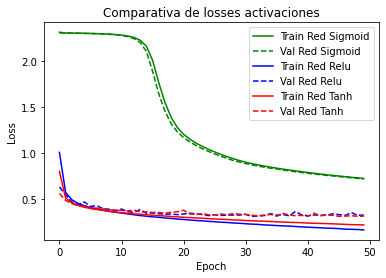

In [9]:
plot_compare_losses(hist_sig, hist_relu, hist_tanh, 
                    name1="Red Sigmoid", name2="Red Relu", name3="Red Tanh", 
                    title = "Comparativa de losses activaciones")

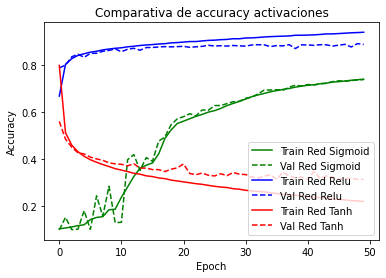

In [10]:
plot_compare_accs(hist_sig, hist_relu, hist_tanh, 
                  name1="Red Sigmoid", name2="Red Relu", name3="Red Tanh", 
                  title = "Comparativa de accuracy activaciones")

In [11]:
print("Las comparativas de accuracy con el dataset de test es:\n", 
      acc_nn_sig, "para Sigmoid\n", 
      acc_nn_relu, "para Relu\n",
      acc_nn_tanh, "para Tanh")

Las comparativas de accuracy con el dataset de test es:
 0.7379999756813049 para Sigmoid
 0.8816999793052673 para Relu
 0.8784000277519226 para Tanh


Se evidencia que el activador Relu ofrece mejores resultados que las demás unidades de activación

## 2. Inicialización de parámetros

En este ejercicio, vamos a evaluar la importancia de una correcta inicialización de parámetros en una red neuronal.

**Ejercicio 2 *(1.25 puntos)***: Partiendo de una red similar a la del ejercicio anterior (usando ya ReLUs), comentar las diferencias que se aprecian en el entrenamiento al utilizar distintas estrategias de inicialización de parámetros. Para ello, inicializar todas las capas con las siguientes estrategias, disponibles en Keras, y analizar sus diferencias:

* Inicialización con ceros.
* Inicialización con una variable aleatoria normal.
* Inicialización con los valores por defecto de Keras para una capa Dense (estrategia *glorot uniform*)

### Inicialización con ceros


In [12]:
NN_relu_z = Sequential()

NN_relu_z.add(Dense(397, input_shape=(784,), activation = 'relu', kernel_initializer = 'zeros'))
NN_relu_z.add(Dense(128, activation = 'relu', kernel_initializer = 'zeros'))
NN_relu_z.add(Dense(128, activation = 'relu', kernel_initializer = 'zeros'))
NN_relu_z.add(Dense(64, activation = 'relu', kernel_initializer = 'zeros'))
NN_relu_z.add(Dense(10, activation = 'softmax', kernel_initializer = 'zeros'))

NN_relu_z.compile(optimizer = 'SGD', 
                loss = 'categorical_crossentropy', 
                metrics = ['acc'])

hist_relu_z = NN_relu_z.fit(X_train, y_train, 
                       batch_size = batch_size, 
                       epochs = epochs, 
                       verbose = 1, 
                       validation_split=0.2)

acc_nn_relu_z = NN_relu_z.evaluate(X_test, y_test, verbose = 1)[1]

#plt.figure()
#plot_acc(hist_relu_z, title = "Accuracy de zeros")

#plt.figure()
#plot_loss(hist_relu_z, title = "Loss de zeros")

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 5s 103us/step - loss: 2.3026 - acc: 0.0982 - val_loss: 2.3027 - val_acc: 0.0957
Epoch 2/50
48000/48000 [==============================] - 5s 103us/step - loss: 2.3026 - acc: 0.1001 - val_loss: 2.3027 - val_acc: 0.0957
Epoch 3/50
48000/48000 [==============================] - 5s 101us/step - loss: 2.3026 - acc: 0.1006 - val_loss: 2.3027 - val_acc: 0.0957
Epoch 4/50
48000/48000 [==============================] - 5s 101us/step - loss: 2.3026 - acc: 0.0980 - val_loss: 2.3027 - val_acc: 0.0957
Epoch 5/50
48000/48000 [==============================] - 5s 101us/step - loss: 2.3026 - acc: 0.1011 - val_loss: 2.3027 - val_acc: 0.0957
Epoch 6/50
48000/48000 [==============================] - 5s 101us/step - loss: 2.3026 - acc: 0.0970 - val_loss: 2.3027 - val_acc: 0.0957
Epoch 7/50
48000/48000 [==============================] - 5s 101us/step - loss: 2.3026 - acc: 0.1000 - val_loss: 2.3027 - 

### Inicialización con aleatoria normal

In [13]:
NN_relu_rn = Sequential()

NN_relu_rn.add(Dense(397, input_shape=(784,), activation = 'relu', kernel_initializer = 'random_normal'))
NN_relu_rn.add(Dense(128, activation = 'relu', kernel_initializer = 'random_normal'))
NN_relu_rn.add(Dense(128, activation = 'relu', kernel_initializer = 'random_normal'))
NN_relu_rn.add(Dense(64, activation = 'relu', kernel_initializer = 'random_normal'))
NN_relu_rn.add(Dense(10, activation = 'softmax', kernel_initializer = 'random_normal'))

NN_relu_rn.compile(optimizer = 'SGD', 
                loss = 'categorical_crossentropy', 
                metrics = ['acc'])

hist_relu_rn = NN_relu_rn.fit(X_train, y_train, 
                       batch_size = batch_size, 
                       epochs = epochs, 
                       verbose = 1, 
                       validation_split=0.2)

acc_nn_relu_rn = NN_relu_rn.evaluate(X_test, y_test, verbose = 1)[1]

#plt.figure()
#plot_acc(hist_relu_rn, title = "Accuracy de random_normal")

#plt.figure()
#plot_loss(hist_relu_rn, title = "Loss de random_normal")

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 6s 122us/step - loss: 2.1940 - acc: 0.2678 - val_loss: 1.7033 - val_acc: 0.4613
Epoch 2/50
48000/48000 [==============================] - 6s 117us/step - loss: 1.0955 - acc: 0.5732 - val_loss: 0.8475 - val_acc: 0.6702
Epoch 3/50
48000/48000 [==============================] - 5s 114us/step - loss: 0.7648 - acc: 0.7073 - val_loss: 0.7236 - val_acc: 0.7366
Epoch 4/50
48000/48000 [==============================] - 6s 122us/step - loss: 0.6511 - acc: 0.7630 - val_loss: 0.6137 - val_acc: 0.7776
Epoch 5/50
48000/48000 [==============================] - 5s 111us/step - loss: 0.5849 - acc: 0.7914 - val_loss: 0.5808 - val_acc: 0.8025
Epoch 6/50
48000/48000 [==============================] - 5s 111us/step - loss: 0.5449 - acc: 0.8080 - val_loss: 0.5267 - val_acc: 0.8180
Epoch 7/50
48000/48000 [==============================] - 5s 100us/step - loss: 0.5111 - acc: 0.8205 - val_loss: 0.5007 - 

### Inicialización con glorot uniform

In [14]:
NN_relu_gu = Sequential()

NN_relu_gu.add(Dense(397, input_shape=(784,), activation = 'relu', kernel_initializer = 'glorot_uniform'))
NN_relu_gu.add(Dense(128, activation = 'relu', kernel_initializer = 'glorot_uniform'))
NN_relu_gu.add(Dense(128, activation = 'relu', kernel_initializer = 'glorot_uniform'))
NN_relu_gu.add(Dense(64, activation = 'relu', kernel_initializer = 'glorot_uniform'))
NN_relu_gu.add(Dense(10, activation = 'softmax', kernel_initializer = 'glorot_uniform'))

NN_relu_gu.compile(optimizer = 'SGD', 
                loss = 'categorical_crossentropy', 
                metrics = ['acc'])

hist_relu_gu = NN_relu_gu.fit(X_train, y_train, 
                       batch_size = batch_size, 
                       epochs = epochs, 
                       verbose = 1, 
                       validation_split=0.2)

acc_nn_relu_gu = NN_relu_gu.evaluate(X_test, y_test, verbose = 1)[1]

#plt.figure()
#plot_acc(hist_relu_rn, title = "Accuracy de glorot_uniform")

#plt.figure()
#plot_loss(hist_relu_rn, title = "Loss de glorot_uniform")

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 5s 103us/step - loss: 0.9776 - acc: 0.6657 - val_loss: 0.5904 - val_acc: 0.7918
Epoch 2/50
48000/48000 [==============================] - 5s 97us/step - loss: 0.5489 - acc: 0.8105 - val_loss: 0.5082 - val_acc: 0.8220
Epoch 3/50
48000/48000 [==============================] - 5s 98us/step - loss: 0.4824 - acc: 0.8296 - val_loss: 0.4615 - val_acc: 0.8378
Epoch 4/50
48000/48000 [==============================] - 5s 97us/step - loss: 0.4492 - acc: 0.8415 - val_loss: 0.4388 - val_acc: 0.8442
Epoch 5/50
48000/48000 [==============================] - 5s 100us/step - loss: 0.4236 - acc: 0.8512 - val_loss: 0.4320 - val_acc: 0.8455
Epoch 6/50
48000/48000 [==============================] - 5s 102us/step - loss: 0.4038 - acc: 0.8561 - val_loss: 0.4302 - val_acc: 0.8468
Epoch 7/50
48000/48000 [==============================] - 5s 100us/step - loss: 0.3891 - acc: 0.8616 - val_loss: 0.4193 - val

### Comparativa de redes

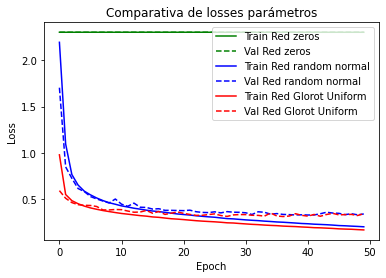

In [15]:
plot_compare_losses(hist_relu_z, hist_relu_rn, hist_relu_gu, 
                    name1="Red zeros", name2="Red random normal", name3="Red Glorot Uniform", 
                    title = "Comparativa de losses parámetros")

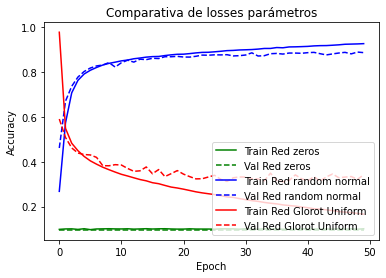

In [16]:
plot_compare_accs(hist_relu_z, hist_relu_rn, hist_relu_gu, 
                  name1="Red zeros", name2="Red random normal", name3="Red Glorot Uniform", 
                  title = "Comparativa de losses parámetros")

In [17]:
print("Las comparativas de accuracy con el dataset de test es:\n", 
      acc_nn_relu_z, "para zeros\n", 
      acc_nn_relu_rn, "para random normal\n",
      acc_nn_relu_gu, "para glorot uniform")

Las comparativas de accuracy con el dataset de test es:
 0.10000000149011612 para zeros
 0.8772000074386597 para random normal
 0.8805999755859375 para glorot uniform


El mejor inicializador para esta red es el random normal

## 3. Optimizadores

**Ejercicio 3 *(1.25 puntos)***: Partiendo de una red similar a la del ejercicio anterior (utilizando la mejor estrategia de inicialización observada), comparar y analizar las diferencias que se observan  al entrenar con varios de los optimizadores vistos en clase, incluyendo SGD como optimizador básico (se puede explorar el espacio de hiperparámetros de cada optimizador, aunque para optimizadores más avanzados del estilo de adam y RMSprop es buena idea dejar los valores por defecto provistos por Keras).

### Optimizador SGD

In [18]:
NN_relu_SGD = Sequential()

NN_relu_SGD.add(Dense(397, input_shape=(784,), activation = 'relu', kernel_initializer = 'random_normal'))
NN_relu_SGD.add(Dense(128, activation = 'relu', kernel_initializer = 'random_normal'))
NN_relu_SGD.add(Dense(128, activation = 'relu', kernel_initializer = 'random_normal'))
NN_relu_SGD.add(Dense(64, activation = 'relu', kernel_initializer = 'random_normal'))
NN_relu_SGD.add(Dense(10, activation = 'softmax', kernel_initializer = 'random_normal'))

NN_relu_SGD.compile(optimizer = 'SGD', 
                loss = 'categorical_crossentropy', 
                metrics = ['acc'])

hist_relu_SGD = NN_relu_SGD.fit(X_train, y_train, 
                       batch_size = batch_size, 
                       epochs = epochs, 
                       verbose = 1, 
                       validation_split=0.2)

acc_nn_relu_SGD = NN_relu_SGD.evaluate(X_test, y_test, verbose = 1)[1]

#plt.figure()
#plot_acc(hist_relu_SGD, title = "Accuracy de zeros")

#plt.figure()
#plot_loss(hist_relu_SGD, title = "Loss de zeros")

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 5s 104us/step - loss: 2.1553 - acc: 0.2999 - val_loss: 1.5360 - val_acc: 0.5558
Epoch 2/50
48000/48000 [==============================] - 5s 99us/step - loss: 1.0555 - acc: 0.5960 - val_loss: 0.8251 - val_acc: 0.7060
Epoch 3/50
48000/48000 [==============================] - 5s 98us/step - loss: 0.7604 - acc: 0.7117 - val_loss: 0.6926 - val_acc: 0.7393
Epoch 4/50
48000/48000 [==============================] - 5s 97us/step - loss: 0.6497 - acc: 0.7658 - val_loss: 0.6412 - val_acc: 0.7728
Epoch 5/50
48000/48000 [==============================] - 5s 96us/step - loss: 0.5812 - acc: 0.7946 - val_loss: 0.5530 - val_acc: 0.8105
Epoch 6/50
48000/48000 [==============================] - 5s 95us/step - loss: 0.5333 - acc: 0.8135 - val_loss: 0.5173 - val_acc: 0.8176
Epoch 7/50
48000/48000 [==============================] - 5s 97us/step - loss: 0.4999 - acc: 0.8253 - val_loss: 0.4994 - val_ac

### Optimizador Adam

In [19]:
NN_relu_adam = Sequential()

NN_relu_adam.add(Dense(397, input_shape=(784,), activation = 'relu', kernel_initializer = 'random_normal'))
NN_relu_adam.add(Dense(128, activation = 'relu', kernel_initializer = 'random_normal'))
NN_relu_adam.add(Dense(128, activation = 'relu', kernel_initializer = 'random_normal'))
NN_relu_adam.add(Dense(64, activation = 'relu', kernel_initializer = 'random_normal'))
NN_relu_adam.add(Dense(10, activation = 'softmax', kernel_initializer = 'random_normal'))

NN_relu_adam.compile(optimizer = 'adam', 
                loss = 'categorical_crossentropy', 
                metrics = ['acc'])

hist_relu_adam = NN_relu_adam.fit(X_train, y_train, 
                       batch_size = batch_size, 
                       epochs = epochs, 
                       verbose = 1, 
                       validation_split=0.2)

acc_nn_relu_adam = NN_relu_adam.evaluate(X_test, y_test, verbose = 1)[1]

#plt.figure()
#plot_acc(hist_relu_adam, title = "Accuracy de zeros")

#plt.figure()
#plot_loss(hist_relu_adam, title = "Loss de zeros")

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 6s 130us/step - loss: 0.5900 - acc: 0.7834 - val_loss: 0.4363 - val_acc: 0.8415
Epoch 2/50
48000/48000 [==============================] - 6s 127us/step - loss: 0.3933 - acc: 0.8578 - val_loss: 0.3914 - val_acc: 0.8581
Epoch 3/50
48000/48000 [==============================] - 6s 131us/step - loss: 0.3487 - acc: 0.8729 - val_loss: 0.3540 - val_acc: 0.8662
Epoch 4/50
48000/48000 [==============================] - 6s 127us/step - loss: 0.3213 - acc: 0.8820 - val_loss: 0.3901 - val_acc: 0.8537
Epoch 5/50
48000/48000 [==============================] - 6s 128us/step - loss: 0.2973 - acc: 0.8905 - val_loss: 0.3486 - val_acc: 0.8799
Epoch 6/50
48000/48000 [==============================] - 6s 127us/step - loss: 0.2851 - acc: 0.8946 - val_loss: 0.3166 - val_acc: 0.8828
Epoch 7/50
48000/48000 [==============================] - 6s 126us/step - loss: 0.2706 - acc: 0.8978 - val_loss: 0.3286 - 

### Optimizador RMSprop

In [20]:
NN_relu_RMS = Sequential()

NN_relu_RMS.add(Dense(397, input_shape=(784,), activation = 'relu', kernel_initializer = 'random_normal'))
NN_relu_RMS.add(Dense(128, activation = 'relu', kernel_initializer = 'random_normal'))
NN_relu_RMS.add(Dense(128, activation = 'relu', kernel_initializer = 'random_normal'))
NN_relu_RMS.add(Dense(64, activation = 'relu', kernel_initializer = 'random_normal'))
NN_relu_RMS.add(Dense(10, activation = 'softmax', kernel_initializer = 'random_normal'))

NN_relu_RMS.compile(optimizer = 'RMSprop', 
                loss = 'categorical_crossentropy', 
                metrics = ['acc'])

hist_relu_RMS = NN_relu_RMS.fit(X_train, y_train, 
                       batch_size = batch_size, 
                       epochs = epochs, 
                       verbose = 1, 
                       validation_split=0.2)

acc_nn_relu_RMS = NN_relu_RMS.evaluate(X_test, y_test, verbose = 1)[1]

#plt.figure()
#plot_acc(hist_relu_RMS, title = "Accuracy de zeros")

#plt.figure()
#plot_loss(hist_relu_RMS, title = "Loss de zeros")

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 6s 115us/step - loss: 0.6084 - acc: 0.7719 - val_loss: 0.4284 - val_acc: 0.8466
Epoch 2/50
48000/48000 [==============================] - 5s 113us/step - loss: 0.4012 - acc: 0.8526 - val_loss: 0.4295 - val_acc: 0.8432
Epoch 3/50
48000/48000 [==============================] - 5s 113us/step - loss: 0.3598 - acc: 0.8697 - val_loss: 0.3594 - val_acc: 0.8753
Epoch 4/50
48000/48000 [==============================] - 5s 114us/step - loss: 0.3332 - acc: 0.8801 - val_loss: 0.3834 - val_acc: 0.8588
Epoch 5/50
48000/48000 [==============================] - 5s 113us/step - loss: 0.3169 - acc: 0.8846 - val_loss: 0.3754 - val_acc: 0.8787
Epoch 6/50
48000/48000 [==============================] - 6s 115us/step - loss: 0.3055 - acc: 0.8906 - val_loss: 0.3714 - val_acc: 0.8708
Epoch 7/50
48000/48000 [==============================] - 5s 112us/step - loss: 0.2971 - acc: 0.8927 - val_loss: 0.3585 - 

### Comparativa de redes

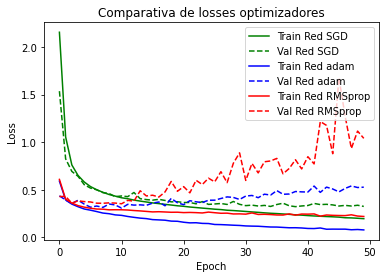

In [21]:
plot_compare_losses(hist_relu_SGD, hist_relu_adam, hist_relu_RMS, 
                    name1="Red SGD", name2="Red adam", name3="Red RMSprop", 
                    title = "Comparativa de losses optimizadores")

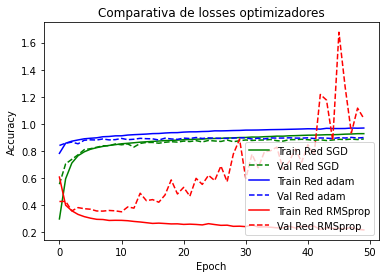

In [22]:
plot_compare_accs(hist_relu_SGD, hist_relu_adam, hist_relu_RMS, 
                  name1="Red SGD", name2="Red adam", name3="Red RMSprop", 
                  title = "Comparativa de losses optimizadores")

In [23]:
print("Las comparativas de accuracy con el dataset de test es:\n", 
      acc_nn_relu_SGD, "para SGD\n", 
      acc_nn_relu_adam, "para adam\n",
      acc_nn_relu_RMS, "para RMSprop")

Las comparativas de accuracy con el dataset de test es:
 0.880299985408783 para SGD
 0.8932999968528748 para adam
 0.8852999806404114 para RMSprop


El mejor optimizador es adam

## 4. Regularización y red final *(1.25 puntos)*

**Ejercicio 4.1**: Entrenar una red final que sea capaz de obtener una accuracy en el validation set cercana al 90%. Para ello, combinar todo lo aprendido anteriormente y utilizar técnicas de regularización para evitar overfitting. Algunos de los elementos que pueden tenerse en cuenta son los siguientes.

* Número de capas y neuronas por capa
* Optimizadores y sus parámetros
* Batch size
* Unidades de activación
* Uso de capas dropout, regularización L2, regularización L1...
* Early stopping (se puede aplicar como un callback de Keras, o se puede ver un poco "a ojo" cuándo el modelo empieza a caer en overfitting y seleccionar el número de epochs necesarias)
* Batch normalization

Si los modelos entrenados anteriormente ya se acercaban al valor requerido de accuracy, probar distintas estrategias igualmente y comentar los resultados.

Explicar brevemente la estrategia seguida y los modelos probados para obtener el modelo final, que debe verse entrenado en este Notebook. No es necesario guardar el entrenamiento de todos los modelos que se han probado, es suficiente con explicar cómo se ha llegado al modelo final.

### Cambio de arquitectura

In [24]:
NN_relu_fin1 = Sequential()

NN_relu_fin1.add(Dense(128, input_shape=(784,), activation = 'relu', kernel_initializer = 'random_normal'))
NN_relu_fin1.add(Dense(64, activation = 'relu', kernel_initializer = 'random_normal'))
NN_relu_fin1.add(Dense(64, activation = 'relu', kernel_initializer = 'random_normal'))
NN_relu_fin1.add(Dense(10, activation = 'softmax', kernel_initializer = 'random_normal'))

NN_relu_fin1.compile(optimizer = 'adam', 
                loss = 'categorical_crossentropy', 
                metrics = ['acc'])

hist_relu_fin1 = NN_relu_fin1.fit(X_train, y_train, 
                       batch_size = batch_size, 
                       epochs = epochs, 
                       verbose = 1, 
                       validation_split=0.2)

acc_nn_relu_fin1 = NN_relu_fin1.evaluate(X_test, y_test, verbose = 1)[1]

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 3s 64us/step - loss: 0.6372 - acc: 0.7727 - val_loss: 0.4661 - val_acc: 0.8311
Epoch 2/50
48000/48000 [==============================] - 3s 61us/step - loss: 0.4170 - acc: 0.8511 - val_loss: 0.4055 - val_acc: 0.8537
Epoch 3/50
48000/48000 [==============================] - 3s 61us/step - loss: 0.3644 - acc: 0.8677 - val_loss: 0.3717 - val_acc: 0.8662
Epoch 4/50
48000/48000 [==============================] - 3s 59us/step - loss: 0.3371 - acc: 0.8770 - val_loss: 0.3488 - val_acc: 0.8757
Epoch 5/50
48000/48000 [==============================] - 3s 58us/step - loss: 0.3160 - acc: 0.8839 - val_loss: 0.3440 - val_acc: 0.8804
Epoch 6/50
48000/48000 [==============================] - 3s 60us/step - loss: 0.2996 - acc: 0.8894 - val_loss: 0.3324 - val_acc: 0.8793
Epoch 7/50
48000/48000 [==============================] - 3s 60us/step - loss: 0.2836 - acc: 0.8942 - val_loss: 0.3411 - val_acc

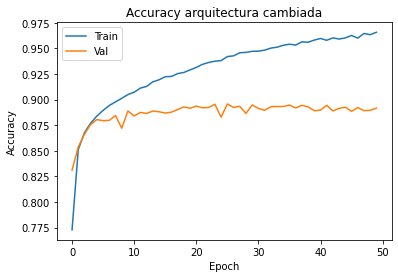

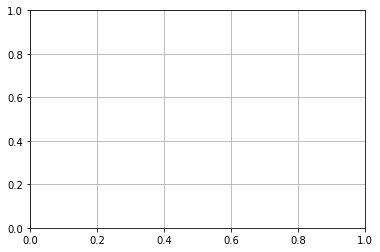

In [25]:
plot_acc(hist_relu_fin1, title = "Accuracy arquitectura cambiada")
plt.grid(True)

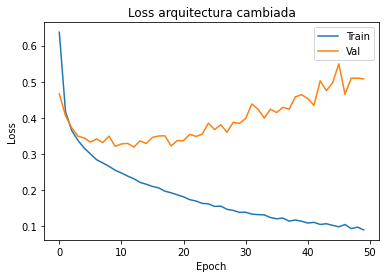

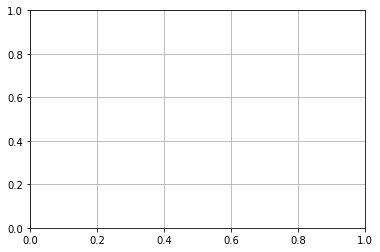

In [26]:
plot_loss(hist_relu_fin1, title = "Loss arquitectura cambiada")
plt.grid(True)

In [27]:
print("El accuracy con el dataset de test es: ", acc_nn_relu_fin1)

El accuracy con el dataset de test es:  0.8859000205993652


Se modificó la arquitectura de las capas hasta encontrar una que alcance un accuracy similar a la red profunda original pero con tiempos de entrenamiento menores

### Modificaciones en Optimizadores

In [28]:
batch_size = 64 #cambio batch size
epochs = 50 #cambio batch size

#Learning rate decay
batches_per_epoch = 48000/batch_size
lr_decay = (1. / 0.5 - 1)/batches_per_epoch #50% del learning rate original
keras.optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=lr_decay)



NN_relu_fin2 = Sequential()

NN_relu_fin2.add(Dense(128, input_shape=(784,), activation = 'relu', kernel_initializer = 'random_normal'))
NN_relu_fin2.add(Dense(64, activation = 'relu', kernel_initializer = 'random_normal'))
NN_relu_fin2.add(Dense(64, activation = 'relu', kernel_initializer = 'random_normal'))
NN_relu_fin2.add(Dense(10, activation = 'softmax', kernel_initializer = 'random_normal'))

NN_relu_fin2.compile(optimizer = 'adam', 
                loss = 'categorical_crossentropy', 
                metrics = ['acc'])

hist_relu_fin2 = NN_relu_fin2.fit(X_train, y_train, 
                       batch_size = batch_size, 
                       epochs = epochs, 
                       verbose = 1, 
                       validation_split=0.2)

acc_nn_relu_fin2 = NN_relu_fin2.evaluate(X_test, y_test, verbose = 1)[1]

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 3s 67us/step - loss: 0.6325 - acc: 0.7726 - val_loss: 0.4466 - val_acc: 0.8434
Epoch 2/50
48000/48000 [==============================] - 3s 66us/step - loss: 0.4128 - acc: 0.8529 - val_loss: 0.3833 - val_acc: 0.8607
Epoch 3/50
48000/48000 [==============================] - 3s 69us/step - loss: 0.3642 - acc: 0.8675 - val_loss: 0.3679 - val_acc: 0.8665
Epoch 4/50
48000/48000 [==============================] - 3s 63us/step - loss: 0.3374 - acc: 0.8767 - val_loss: 0.3851 - val_acc: 0.8601
Epoch 5/50
48000/48000 [==============================] - 3s 58us/step - loss: 0.3175 - acc: 0.8825 - val_loss: 0.3395 - val_acc: 0.8749
Epoch 6/50
48000/48000 [==============================] - 3s 59us/step - loss: 0.3034 - acc: 0.8875 - val_loss: 0.3588 - val_acc: 0.8697
Epoch 7/50
48000/48000 [==============================] - 3s 59us/step - loss: 0.2896 - acc: 0.8919 - val_loss: 0.3716 - val_acc

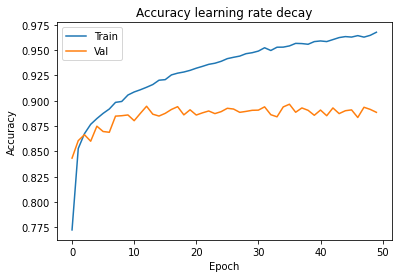

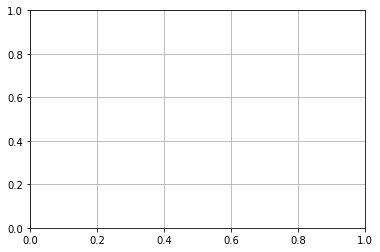

In [29]:
plot_acc(hist_relu_fin2, title = "Accuracy learning rate decay")
plt.grid(True)

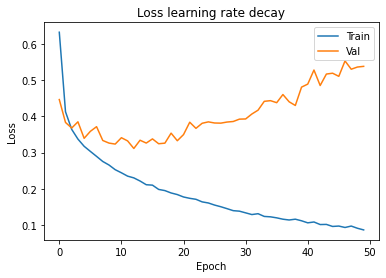

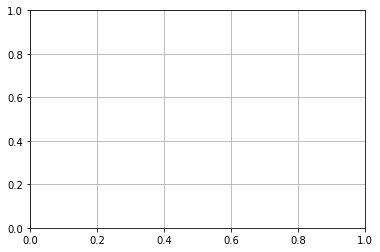

In [30]:
plot_loss(hist_relu_fin2, title = "Loss learning rate decay")
plt.grid(True)

In [31]:
print("El accuracy con el dataset de test es: ", acc_nn_relu_fin2)

El accuracy con el dataset de test es:  0.8826000094413757


Se agregó un parámetro de learning rate decay, así mismo se modificó el learning rate original

### Modificaciones en batch

In [32]:
batch_size = 48 #cambio batch size
epochs = 50 #cambio batch size

#Learning rate decay
batches_per_epoch = 48000/batch_size
lr_decay = (1. / 0.5 - 1)/batches_per_epoch #50% del learning rate original
keras.optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=lr_decay)

NN_relu_fin3 = Sequential()

NN_relu_fin3.add(Dense(128, input_shape=(784,), activation = 'relu', kernel_initializer = 'random_normal'))
NN_relu_fin3.add(Dense(64, activation = 'relu', kernel_initializer = 'random_normal'))
NN_relu_fin3.add(Dense(64, activation = 'relu', kernel_initializer = 'random_normal'))
NN_relu_fin3.add(Dense(10, activation = 'softmax', kernel_initializer = 'random_normal'))

NN_relu_fin3.compile(optimizer = 'adam', 
                loss = 'categorical_crossentropy', 
                metrics = ['acc'])

hist_relu_fin3 = NN_relu_fin3.fit(X_train, y_train, 
                       batch_size = batch_size, 
                       epochs = epochs, 
                       verbose = 1, 
                       validation_split=0.2)

acc_nn_relu_fin3 = NN_relu_fin3.evaluate(X_test, y_test, verbose = 1)[1]

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 4s 83us/step - loss: 0.6221 - acc: 0.7705 - val_loss: 0.4402 - val_acc: 0.8414
Epoch 2/50
48000/48000 [==============================] - 4s 76us/step - loss: 0.4122 - acc: 0.8495 - val_loss: 0.3914 - val_acc: 0.8547
Epoch 3/50
48000/48000 [==============================] - 4s 74us/step - loss: 0.3628 - acc: 0.8662 - val_loss: 0.3623 - val_acc: 0.8648
Epoch 4/50
48000/48000 [==============================] - 3s 73us/step - loss: 0.3359 - acc: 0.8758 - val_loss: 0.3524 - val_acc: 0.8719
Epoch 5/50
48000/48000 [==============================] - 4s 77us/step - loss: 0.3143 - acc: 0.8838 - val_loss: 0.3276 - val_acc: 0.8833
Epoch 6/50
48000/48000 [==============================] - 4s 74us/step - loss: 0.3007 - acc: 0.8876 - val_loss: 0.3749 - val_acc: 0.8677
Epoch 7/50
48000/48000 [==============================] - 4s 74us/step - loss: 0.2868 - acc: 0.8929 - val_loss: 0.3355 - val_acc

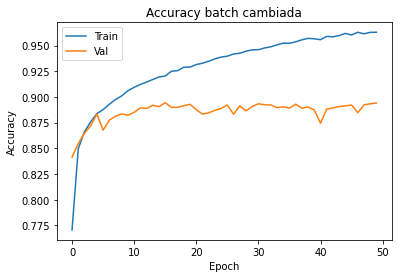

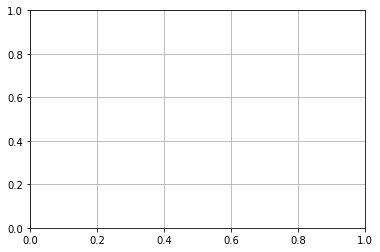

In [33]:
plot_acc(hist_relu_fin3, title = "Accuracy batch cambiada")
plt.grid(True)

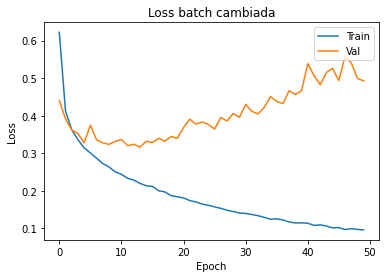

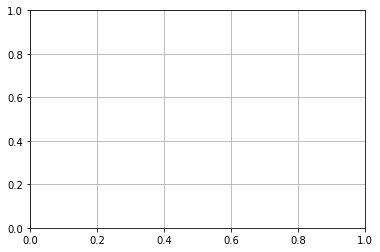

In [34]:
plot_loss(hist_relu_fin3, title = "Loss batch cambiada")
plt.grid(True)

In [35]:
print("El accuracy con el dataset de test es: ", acc_nn_relu_fin3)

El accuracy con el dataset de test es:  0.8888000249862671


Se redujo el tamaño de batch y se evidenció una ligera mejora en el accuracy

### Dropout y regularización

In [36]:
batch_size = 48 #cambio batch size
epochs = 100 #cambio batch size

#Learning rate decay
batches_per_epoch = 48000/batch_size
lr_decay = (1. / 0.5 - 1)/batches_per_epoch #50% del learning rate original
keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=lr_decay)

NN_relu_fin4 = Sequential()

NN_relu_fin4.add(Dense(128, input_shape=(784,), activation = 'relu', kernel_initializer = 'random_normal'))
NN_relu_fin4.add(Dropout(0.2))
NN_relu_fin4.add(Dense(64, activation = 'relu', kernel_initializer = 'random_normal'))
NN_relu_fin4.add(Dropout(0.2))
NN_relu_fin4.add(Dense(64, activation = 'relu', kernel_initializer = 'random_normal'))
NN_relu_fin4.add(Dropout(0.2))
NN_relu_fin4.add(Dense(10, activation = 'softmax', kernel_initializer = 'random_normal'))

NN_relu_fin4.compile(optimizer = 'adam', 
                loss = 'categorical_crossentropy', 
                metrics = ['acc'])

hist_relu_fin4 = NN_relu_fin4.fit(X_train, y_train, 
                       batch_size = batch_size, 
                       epochs = epochs, 
                       verbose = 1, 
                       validation_split=0.2)

acc_nn_relu_fin4 = NN_relu_fin4.evaluate(X_test, y_test, verbose = 1)[1]

Train on 48000 samples, validate on 12000 samples
Epoch 1/100
48000/48000 [==============================] - 4s 90us/step - loss: 0.7109 - acc: 0.7354 - val_loss: 0.4564 - val_acc: 0.8349
Epoch 2/100
48000/48000 [==============================] - 4s 88us/step - loss: 0.4639 - acc: 0.8359 - val_loss: 0.4151 - val_acc: 0.8504
Epoch 3/100
48000/48000 [==============================] - 4s 92us/step - loss: 0.4206 - acc: 0.8506 - val_loss: 0.3850 - val_acc: 0.8632
Epoch 4/100
48000/48000 [==============================] - 4s 87us/step - loss: 0.3936 - acc: 0.8600 - val_loss: 0.3629 - val_acc: 0.8737
Epoch 5/100
48000/48000 [==============================] - 4s 90us/step - loss: 0.3732 - acc: 0.8650 - val_loss: 0.3596 - val_acc: 0.8720
Epoch 6/100
48000/48000 [==============================] - 5s 98us/step - loss: 0.3609 - acc: 0.8706 - val_loss: 0.3432 - val_acc: 0.8776
Epoch 7/100
48000/48000 [==============================] - 4s 91us/step - loss: 0.3485 - acc: 0.8750 - val_loss: 0.3372 - 

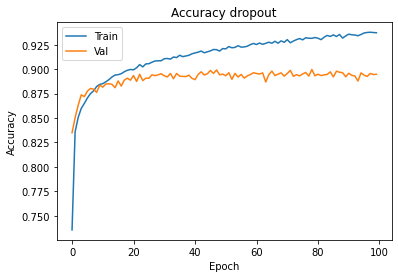

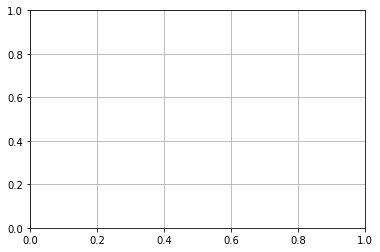

In [37]:
plot_acc(hist_relu_fin4, title = "Accuracy dropout")
plt.grid(True)

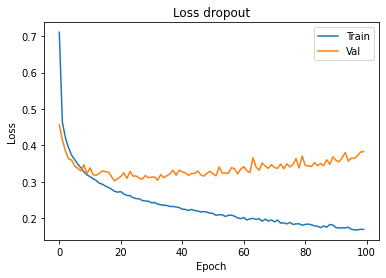

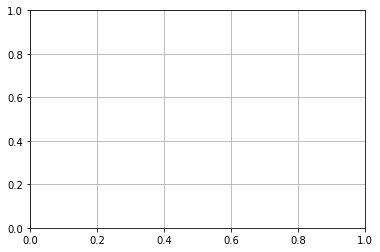

In [38]:
plot_loss(hist_relu_fin4, title = "Loss dropout")
plt.grid(True)

In [39]:
print("El accuracy con el dataset de test es: ", acc_nn_relu_fin4)

El accuracy con el dataset de test es:  0.8906999826431274


Se evidencia notablemente el cambio en la curva de Loss al introducir capas de dropout

****
**Considerando las gráficas se decide utilizar un batch de 30 que ya se estabiliza el accuracy y el loss aún no comienza a crecer**
****

### Batch normalization

In [40]:
from keras.layers.normalization import BatchNormalization
from keras.layers import Activation

batch_size = 48 #cambio batch size
epochs = 30 #cambio batch size

#Learning rate decay
batches_per_epoch = 48000/batch_size
lr_decay = (1. / 0.5 - 1)/batches_per_epoch #50% del learning rate original
keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=lr_decay)

NN_relu_fin5 = Sequential()

NN_relu_fin5.add(Dense(128, input_shape=(784,), kernel_initializer = 'random_normal'))
NN_relu_fin5.add(BatchNormalization())
NN_relu_fin5.add(Activation('relu'))

NN_relu_fin5.add(Dropout(0.2))

NN_relu_fin5.add(Dense(64, kernel_initializer = 'random_normal'))
NN_relu_fin5.add(BatchNormalization())
NN_relu_fin5.add(Activation('relu'))

NN_relu_fin5.add(Dropout(0.2))

NN_relu_fin5.add(Dense(64, kernel_initializer = 'random_normal'))
NN_relu_fin5.add(BatchNormalization())
NN_relu_fin5.add(Activation('relu'))

NN_relu_fin5.add(Dropout(0.2))

NN_relu_fin5.add(Dense(10, kernel_initializer = 'random_normal'))
NN_relu_fin5.add(BatchNormalization())
NN_relu_fin5.add(Activation('softmax'))

NN_relu_fin5.compile(optimizer = 'adam', 
                loss = 'categorical_crossentropy', 
                metrics = ['acc'])

hist_relu_fin5 = NN_relu_fin5.fit(X_train, y_train, 
                       batch_size = batch_size, 
                       epochs = epochs, 
                       verbose = 1, 
                       validation_split=0.2)

acc_nn_relu_fin5 = NN_relu_fin5.evaluate(X_test, y_test, verbose = 1)[1]

Train on 48000 samples, validate on 12000 samples
Epoch 1/30
48000/48000 [==============================] - 6s 122us/step - loss: 0.7844 - acc: 0.7767 - val_loss: 0.4711 - val_acc: 0.8515
Epoch 2/30
48000/48000 [==============================] - 5s 108us/step - loss: 0.5611 - acc: 0.8288 - val_loss: 0.5281 - val_acc: 0.8183
Epoch 3/30
48000/48000 [==============================] - 5s 110us/step - loss: 0.4933 - acc: 0.8426 - val_loss: 0.3933 - val_acc: 0.8658
Epoch 4/30
48000/48000 [==============================] - 5s 108us/step - loss: 0.4546 - acc: 0.8522 - val_loss: 0.3840 - val_acc: 0.8673
Epoch 5/30
48000/48000 [==============================] - 5s 107us/step - loss: 0.4286 - acc: 0.8596 - val_loss: 0.3676 - val_acc: 0.8712
Epoch 6/30
48000/48000 [==============================] - 5s 108us/step - loss: 0.4112 - acc: 0.8644 - val_loss: 0.3910 - val_acc: 0.8613
Epoch 7/30
48000/48000 [==============================] - 5s 109us/step - loss: 0.3919 - acc: 0.8693 - val_loss: 0.3825 - 

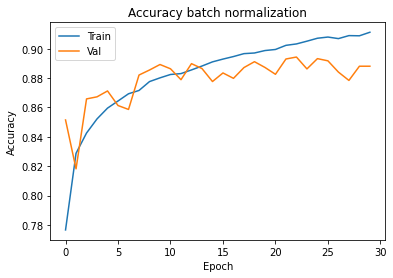

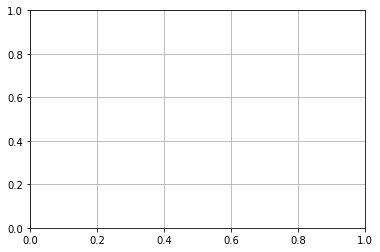

In [41]:
plot_acc(hist_relu_fin5, title = "Accuracy batch normalization")
plt.grid(True)

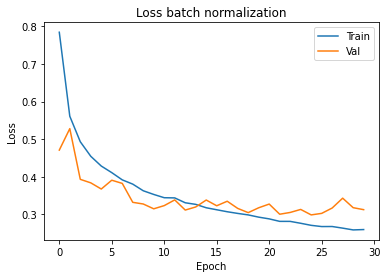

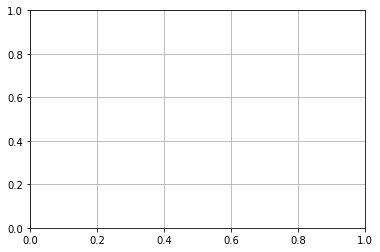

In [42]:
plot_loss(hist_relu_fin5, title = "Loss batch normalization")
plt.grid(True)

In [43]:
print("El accuracy con el dataset de test es: ", acc_nn_relu_fin5)

El accuracy con el dataset de test es:  0.8834999799728394


Se descarta el uso de batch normalization para esta red

### Evaluación del modelo en datos de test

Una vez elegido el que creemos que es nuestro mejor modelo a partir de la estimación que hemos visto en los datos de validación, es hora de utilizar los datos de test para ver cómo se comporta nuestro modelo ante nuevos datos. Si hemos hecho bien las cosas, este número debería ser parecido al valor de nuestra estimación vista en los datos de validación.

**Pregunta 4.2**. Utilizando nuestro mejor modelo, obtener la accuracy resultante en el dataset de test. Comentar este resultado.

Se realiza la comparativa entre la red original del ejercicio 1 y la red final

### Clasificador original ejercicio 1

In [47]:
batch_size = 48 #cambio batch size
epochs = 30 #cambio batch size
#Inicializar la red
classifier = Sequential()

classifier.add(Dense(128, input_shape=(784,), activation = 'sigmoid', kernel_initializer = 'uniform'))
classifier.add(Dense(64, activation = 'sigmoid', kernel_initializer = 'uniform'))
classifier.add(Dense(10, activation = 'softmax', kernel_initializer = 'uniform'))
classifier.compile(optimizer = 'SGD', loss = 'categorical_crossentropy', metrics = ['acc'])

hist_classifier=classifier.fit(X_train, y_train, batch_size = batch_size, epochs = epochs, verbose = 1, validation_split=0.2)
acc_classifier = classifier.evaluate(X_test, y_test, verbose = 1)[1]

Train on 48000 samples, validate on 12000 samples
Epoch 1/30
48000/48000 [==============================] - 3s 59us/step - loss: 2.3030 - acc: 0.1035 - val_loss: 2.3013 - val_acc: 0.1779
Epoch 2/30
48000/48000 [==============================] - 3s 57us/step - loss: 2.3002 - acc: 0.1145 - val_loss: 2.2978 - val_acc: 0.1030
Epoch 3/30
48000/48000 [==============================] - 3s 58us/step - loss: 2.2956 - acc: 0.1320 - val_loss: 2.2924 - val_acc: 0.1667
Epoch 4/30
48000/48000 [==============================] - 3s 56us/step - loss: 2.2832 - acc: 0.1890 - val_loss: 2.2698 - val_acc: 0.3163
Epoch 5/30
48000/48000 [==============================] - 3s 58us/step - loss: 2.2306 - acc: 0.2442 - val_loss: 2.1626 - val_acc: 0.3484
Epoch 6/30
48000/48000 [==============================] - 3s 57us/step - loss: 2.0111 - acc: 0.2861 - val_loss: 1.8529 - val_acc: 0.3301
Epoch 7/30
48000/48000 [==============================] - 3s 58us/step - loss: 1.7575 - acc: 0.3474 - val_loss: 1.6863 - val_acc

### Clasificador final

In [45]:
batch_size = 48 #cambio batch size
epochs = 30 #cambio batch size

#Learning rate decay
batches_per_epoch = 48000/batch_size
lr_decay = (1. / 0.5 - 1)/batches_per_epoch #50% del learning rate original
keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=lr_decay)

NN_relu_fin = Sequential()

NN_relu_fin.add(Dense(128, input_shape=(784,), activation = 'relu', kernel_initializer = 'random_normal'))
NN_relu_fin.add(Dropout(0.2))
NN_relu_fin.add(Dense(64, activation = 'relu', kernel_initializer = 'random_normal'))
NN_relu_fin.add(Dropout(0.2))
NN_relu_fin.add(Dense(64, activation = 'relu', kernel_initializer = 'random_normal'))
NN_relu_fin.add(Dropout(0.2))
NN_relu_fin.add(Dense(10, activation = 'softmax', kernel_initializer = 'random_normal'))

NN_relu_fin.compile(optimizer = 'adam', 
                loss = 'categorical_crossentropy', 
                metrics = ['acc'])

hist_relu_fin = NN_relu_fin.fit(X_train, y_train, 
                       batch_size = batch_size, 
                       epochs = epochs, 
                       verbose = 1, 
                       validation_split=0.2)

acc_nn_relu_fin = NN_relu_fin.evaluate(X_test, y_test, verbose = 1)[1]

Train on 48000 samples, validate on 12000 samples
Epoch 1/30
48000/48000 [==============================] - 4s 90us/step - loss: 0.7069 - acc: 0.7412 - val_loss: 0.4901 - val_acc: 0.8210
Epoch 2/30
48000/48000 [==============================] - 4s 83us/step - loss: 0.4643 - acc: 0.8375 - val_loss: 0.4110 - val_acc: 0.8481
Epoch 3/30
48000/48000 [==============================] - 4s 84us/step - loss: 0.4204 - acc: 0.8508 - val_loss: 0.3759 - val_acc: 0.8649
Epoch 4/30
48000/48000 [==============================] - 4s 86us/step - loss: 0.3905 - acc: 0.8613 - val_loss: 0.3521 - val_acc: 0.8738
Epoch 5/30
48000/48000 [==============================] - 4s 86us/step - loss: 0.3760 - acc: 0.8670 - val_loss: 0.3477 - val_acc: 0.8725
Epoch 6/30
48000/48000 [==============================] - 4s 86us/step - loss: 0.3564 - acc: 0.8715 - val_loss: 0.3524 - val_acc: 0.8744
Epoch 7/30
48000/48000 [==============================] - 4s 84us/step - loss: 0.3482 - acc: 0.8740 - val_loss: 0.3430 - val_acc

### Comparativa de redes

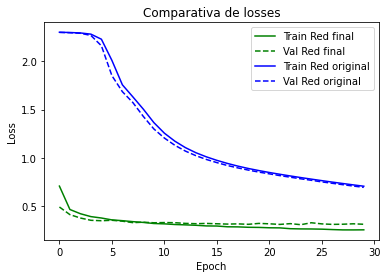

In [48]:
plot_compare_losses2(hist_relu_fin, hist_classifier, 
                    name1="Red final", name2="Red original", 
                    title = "Comparativa de losses")

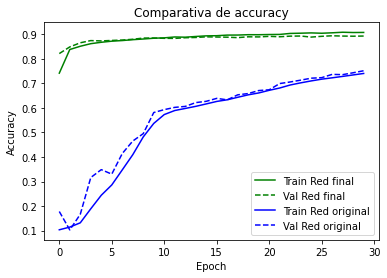

In [49]:
plot_compare_accs2(hist_relu_fin, hist_classifier, 
                    name1="Red final", name2="Red original", 
                    title = "Comparativa de accuracy")

In [50]:
print("Las comparativas de accuracy con el dataset de test es:\n", 
      acc_nn_relu_fin, "para la red final\n", 
      acc_classifier, "para la red original")

Las comparativas de accuracy con el dataset de test es:
 0.8827999830245972 para la red final
 0.7414000034332275 para la red original
